<a href="https://colab.research.google.com/github/hughjafro/DS-Sprint-5-Project-Week/blob/master/DS_151_Project_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test sliding graph

In [37]:
!pip install bokeh

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Rectangle, Arc

from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.io import output_notebook

In [4]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns 

In [39]:
sns.__version__

'0.9.0'

In [40]:
# Load dataset from FiveThirthyEight
url = 'https://projects.fivethirtyeight.com/nba-model/nba_elo.csv'
nba_data = pd.read_csv(url) # Import dataset from assigned url
#Convert date column to datetime format
nba_data['date'] = pd.to_datetime(nba_data['date']) 

# Look at the rows/columns and general statistical data
print(nba_data.shape)
nba_data.describe()

(68324, 24)


,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo1_post,carm-elo2_post,carm-elo_prob1,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2
count,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,67509.000000,67509.000000,5167.000000,5167.000000,4352.000000,4352.000000,5167.000000,5167.000000,1230.000000,1230.000000,1230.000000,1230.000000,67509.000000,67509.000000
mean,1990.414291,0.000439,1496.288527,1496.531596,0.621177,0.378823,1496.139950,1496.478742,1512.581361,1510.895672,1512.443791,1512.551289,0.626500,0.373500,1515.315592,1515.133025,0.620722,0.379278,104.736568,101.052749
std,18.594788,0.020950,112.336802,111.772688,0.178154,0.178154,112.904160,112.062694,117.411214,117.005928,119.041196,118.110868,0.191998,0.191998,117.969715,117.788481,0.201158,0.201158,14.833846,14.283673
min,1947.000000,0.000000,1105.617800,1091.644500,0.062616,0.018315,1100.291900,1085.774400,1187.730784,1192.842155,1187.730784,1192.004524,0.060474,0.013407,1281.328778,1276.551561,0.120228,0.037539,2.000000,0.000000
25%,1976.000000,0.000000,1418.910550,1419.052850,0.498848,0.240520,1417.841700,1418.807900,1438.930652,1438.193630,1434.249496,1435.686432,0.494773,0.220389,1432.879498,1432.879498,0.470104,0.210584,95.000000,92.000000
50%,1992.000000,0.000000,1501.683749,1502.858400,0.639999,0.360001,1501.540900,1502.436000,1511.601379,1511.129658,1510.344856,1512.235418,0.652158,0.347842,1519.041607,1519.041607,0.646996,0.353004,105.000000,101.000000
75%,2006.000000,0.000000,1576.590325,1576.036450,0.759480,0.501152,1576.696200,1576.256600,1589.251142,1585.906281,1585.690723,1583.582698,0.779611,0.505227,1609.128145,1609.128145,0.789416,0.529896,114.000000,110.000000
max,2019.000000,1.000000,1855.779115,1865.449075,0.981685,0.937384,1860.313175,1865.449075,1872.690559,1881.619599,1876.930941,1881.619599,0.986593,0.939526,1765.838659,1767.243578,0.962461,0.879772,184.000000,186.000000


In [0]:
# Create a function to add highest elo win yes(1) or no(0)
def f(row):
    if (row['score1'] > row['score2']) & (row['elo1_pre'] > row['elo2_pre']):
        val = 1
    elif (row['score2'] > row['score1']) & (row['elo2_pre'] > row['elo1_pre']):
        val = 1
    else:
        val = 0
    return val
  
# Create a function to check if home team won
def h(row):
    if (row['score1'] > row['score2']):
        val = 1
    else:
        val = 0
    return val
  
# Create a function to check if home and higher elo team won
def j(row):
    if (row['score1'] > row['score2']) & (row['elo1_pre'] > row['elo2_pre']):
        val = 1
    else:
        val = 0
    return val

In [0]:
nba_data['elo_win'] = nba_data.apply(f, axis=1)
nba_data['home_win'] = nba_data.apply(h, axis=1)
nba_data['home_elo'] = nba_data.apply(j, axis=1)

In [44]:
nba_data.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2,elo_win,home_win,home_elo
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,66.0,68.0,0,0,0
1,1946-11-02,1947,0,NaN,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,...,NaN,NaN,NaN,NaN,NaN,63.0,47.0,0,1,0
2,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,59.0,53.0,0,1,0
3,1946-11-02,1947,0,NaN,STB,PIT,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,56.0,51.0,0,1,0
4,1946-11-02,1947,0,NaN,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,33.0,50.0,0,0,0


In [0]:
nba_rolling_elo1pre = nba_data.elo1_pre.rolling(window=2).mean()
nba_rolling_elo2pre = nba_data.elo2_pre.rolling(window=2).mean()
nba_rolling_elo1post = nba_data.elo1_post.rolling(window=2).mean()
nba_rolling_elo2post = nba_data.elo2_post.rolling(window=2).mean()

In [63]:
bokeh.__version__

'1.0.2'

In [92]:
output_notebook()
dates = nba_data.date
source = ColumnDataSource(data=dict(date=dates, close=nba_data['elo1_pre']))



p = figure(plot_height=300, plot_width=800, tools="", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(dates[1500], dates[2500]))

# p.xaxis.major_label_overrides = {
#     i: date.strftime('%b %d') for i, date in enumerate(pd.to_datetime(df["date"]))

p.line('date', 'close', source=source)
p.yaxis.axis_label = 'Pregame Elo'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                plot_height=130, plot_width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

range_rool = RangeTool(x_range=p.x_range)
range_rool.overlay.fill_color = "red"
range_rool.overlay.fill_alpha = 0.2

select.line('date', 'close', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_rool)
select.toolbar.active_multi = range_rool


show(column(p, select))

Loading BokehJS ...

###Work with 2018 data only

In [93]:
# Select only data from 2017-2018 season
nba_data[nba_data['season'] == 2018]['elo1_pre'].mean()

1513.7851224779076

In [105]:
# Calculate the average Pregame Elo rating for the home team
# Produces a list which is not what I really want
# elo1_pre_avg = [nba_data[nba_data['season'] == yr]['elo1_pre'].mean()
#                  for yr in nba_data.season.unique() ]
#dtype(elo1_pre)

elo1_pre_avg = nba_data.groupby('season').elo1_pre.mean()

elo1_pre_avg.shape

(73,)

In [128]:
group_season = nba_data.groupby('season').season.unique()
group_season.shape

(73,)

In [101]:
elo2_pre_avg = nba_data.groupby('season').elo2_pre.mean()

elo2_pre_avg

season
1947    1307.331552
1948    1401.290556
1949    1451.585632
1950    1459.017875
1951    1510.997963
1952    1522.933066
1953    1522.539219
1954    1529.674409
1955    1536.839371
1956    1529.700003
1957    1522.908763
1958    1521.866209
1959    1520.946641
1960    1528.445307
1961    1521.597701
1962    1501.918048
1963    1502.931159
1964    1500.729799
1965    1501.810309
1966    1504.685856
1967    1495.348572
1968    1390.556892
1969    1406.441887
1970    1429.137707
1971    1436.981344
1972    1454.002316
1973    1473.607254
1974    1479.532391
1975    1481.892009
1976    1495.797500
           ...     
1990    1486.982072
1991    1491.824946
1992    1498.029004
1993    1501.245085
1994    1504.390192
1995    1505.361014
1996    1494.903531
1997    1498.440144
1998    1503.199462
1999    1505.502866
2000    1506.612696
2001    1507.099048
2002    1506.846134
2003    1511.440166
2004    1508.979991
2005    1504.043332
2006    1505.731097
2007    1506.379391
2008    1509.

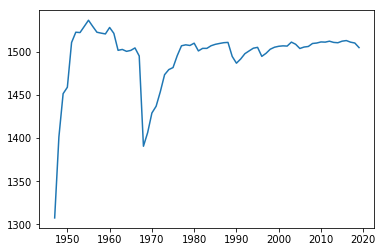

In [129]:
fig = plt.figure()
ax = plt.axes()

x = group_season
ax.plot(x, elo2_pre_avg);